In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
import numpy as np


In [2]:
# get the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets\
.fashion_mnist.load_data()

class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [5]:
# Loading our custom images
def get_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.resize(img, (28,28))
images = np.array([get_image("coat.png"), get_image("dress.png"), get_image("bag.png")])

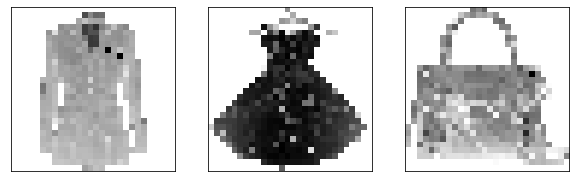

In [6]:
# showing our figure
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()

In [7]:
# Reshaping our images

images_reshaped = images.reshape(images.shape[0], 28, 28, 1)
images_reshaped = tf.cast(images_reshaped, tf.float32)

## First testing our CNN model

In [8]:
# loading our model and predictions
model = tf.keras.models.load_model("png image model using cnn.h5")
preds = model.predict(images_reshaped)

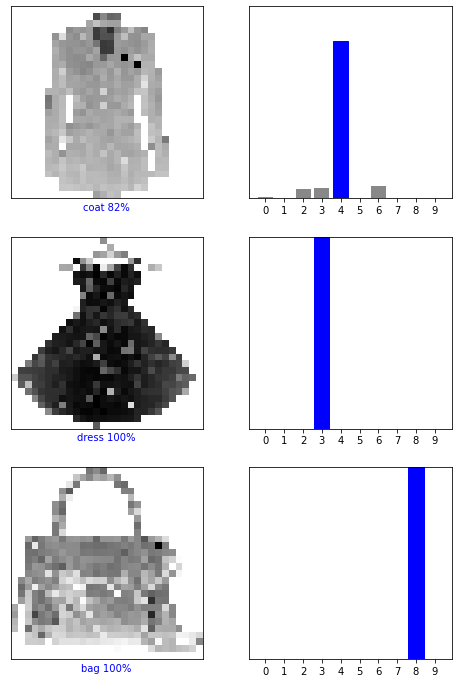

In [9]:
def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")
    
def plot_value_array(prediction):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#888888")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('blue')
    
plt.figure(figsize=(8,12))
for i in range(3):
    # image
    plt.subplot(3, 2, 2*i+1)
    plot_image(preds[i], images[i])
    # bar chart
    plt.subplot(3, 2, 2*i+2)
    plot_value_array(preds[i])
plt.show()  

## Now testing our ANN model

In [10]:
# loading our model and predictions
model = tf.keras.models.load_model("png image model using ann.h5")
preds = model.predict(images_reshaped)

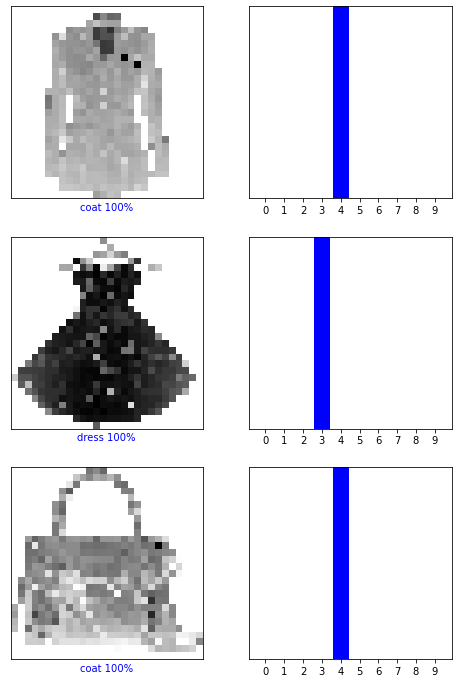

In [11]:
def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")
    
def plot_value_array(prediction):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#888888")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('blue')
    
plt.figure(figsize=(8,12))
for i in range(3):
    # image
    plt.subplot(3, 2, 2*i+1)
    plot_image(preds[i], images[i])
    # bar chart
    plt.subplot(3, 2, 2*i+2)
    plot_value_array(preds[i])
plt.show()  